<a href="https://colab.research.google.com/github/nisaac21/TensorFlow/blob/main/Creating_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

#Dataset 

Using the MNIST Fashion dataset from keras. Incldues 60,000 training images and 10,000 images for testing

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0] # pixels of a full image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[:10] # each integer represents a class

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ["T-shirt/top", 
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

Let's look at one image...

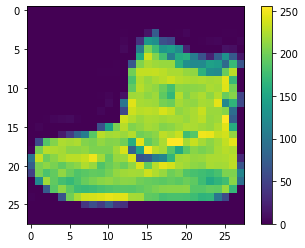

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

##Data Preprocessing

Last step is preprocessing our data, which just means applying some prior transformation.

First, it usually makes sense to keep values between 0 and 1. This is because the weights are usually between 0 and 1 so having large inputs can make extra work for your model. 

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model

In [9]:
# creating the arcitecture for our model
model = keras.Sequential(
    # Defining our layers
    [
     keras.layers.Flatten(input_shape=(28,28)), # makes our 28x28 matrix and flattens it out
     keras.layers.Dense(128, activation='relu'), # first hidden layer, it is dense with 128 neurons
     # usually good idea to have a little bit less neurons than inputs, but not always true
     # using relu activation
     keras.layers.Dense(10, activation='softmax') # using 10 neurons for 10 classes, 
     # softmax makes sure all neurons are between 0-1 and add up to 1 total 

])

In [10]:
#compiling the model
# chosing optimizer and loss function

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4965 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3730 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3118 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2803 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2572 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2500 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

In [11]:
# let's test our model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracry: ", test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8713
Test accuracry:  0.8712999820709229


Hmm, our model seems to have overfit. We were more accurate on the test data as the model stopped generalizing with to many epochs. We can *hyper parameter tune* to try and figure out which model does best 

In [12]:
#compiling the model
# chosing optimizer and loss function

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def best_epoch():
  epoch = 0
  acc = 0
  for i in range(1, 11):
    model.fit(train_images, train_labels, epochs=i)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    if test_acc > acc:
      acc = test_acc
      epoch = i
  return epoch

best_epoch()

313/313 [==============================] - 1s 2ms/step - loss: 0.3273 - accuracy: 0.8849
Epoch 1/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9166
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8838
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2099 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2027 - accuracy: 0.9246
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8824
Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1921 - accuracy: 0.9285
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1880 - accuracy: 0.9295
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1829 - accuracy: 0.9320
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8838
Epoch 1/

5

In [13]:
# after 7 minutes of runtime, we find that 9 is the best model
# See how long hyperparamter tuning can take? Its often the tuning and 
# data collection that takes all the time 

model.fit(train_images, train_labels, epochs=9)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9717
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9714
Epoch 3/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9714
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9715
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0751 - accuracy: 0.9724
Epoch 6/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9728
Epoch 7/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9723
Epoch 8/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9724
Epoch 9/9
313/313 [==============================] - 1s 2ms/step - loss: 0.6565 - accuracy: 0.8885


Pick a number: 7
1/1 [==============================] - 0s 160ms/step
Guess:  Shirt


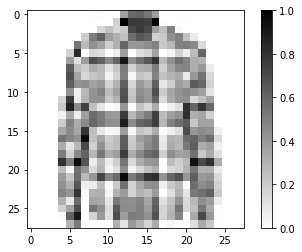

Expected:  Shirt


In [14]:
## Let's make a specific prediction

COLOR = "white"
plt.rcParams['text.color'] = COLOR 
plt.rcParams['axes.labelcolor'] = COLOR 

def predict(model, image, correct_label):
  class_names = ["T-shirt/top", 
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  print("Guess: ", guess)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Expected: ", label)

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return num
    else:
      print("Try again...")
  
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)